In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [4]:
file_name = r"./results/GAresearch.log"
r = []
time = []
with open(file_name) as f:
    for i in f:
        a = re.findall(r'[0-9]*[.,][0-9]+', i)
        b = re.findall(r'[0-9][0-9]+$', i)
        if a:
            time.append(a)
        if b:
            r.append(b)

In [5]:
all=[]
for lst in r:
    all.extend(lst)
    
al1=[]
for lst in r:
    al1.extend(lst)

In [6]:
value_diff = []
value_max = []
max_time = []
for i in range(0,100,10):
    v_m = max([all[index + i] for index in range(10)])
    value_max.append(v_m)
    value_diff.append(int(v_m) - int(min([all[index + i] for index in range(10)])))
    c = all.index(v_m, i, i+10)
    max_time.append(time[c][1]) 

In [7]:
d = {"value_diff" : value_diff, "value_max" : value_max, "max_time" : max_time}
res = pd.DataFrame(d)

In [8]:
res

,value_diff,value_max,max_time
0,67,430,9.94842
1,49,421,4.58991
2,39,419,5.28731
3,53,429,9.13611
4,60,427,4.3456
5,43,425,6.1018
6,53,421,8.27319
7,55,430,4.96702
8,98,463,6.44619
9,66,432,7.20899


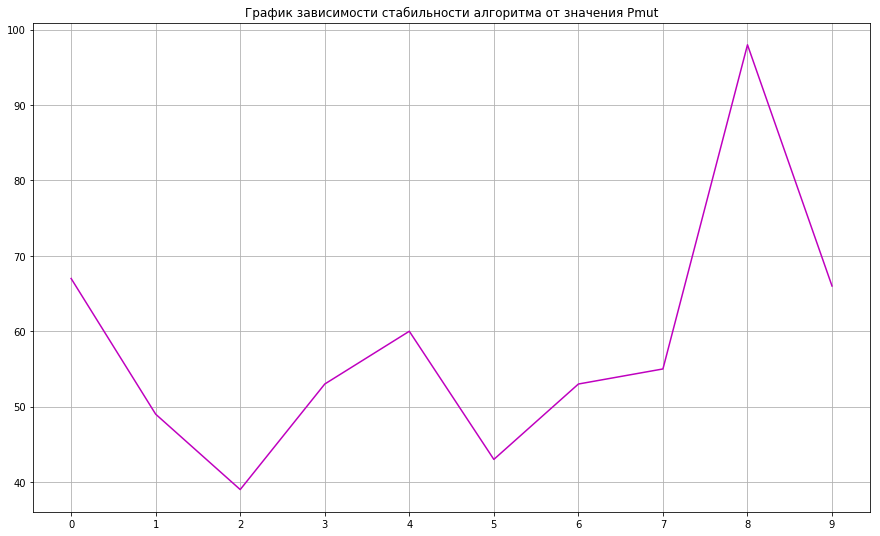

In [9]:
plt.figure(figsize=(15, 9))
plt.title("График зависимости стабильности алгоритма от значения Pmut")
plt.plot(list(res.index), list(res.value_diff), 'm')
plt.xticks(list(res.index))

plt.grid()
plt.show()

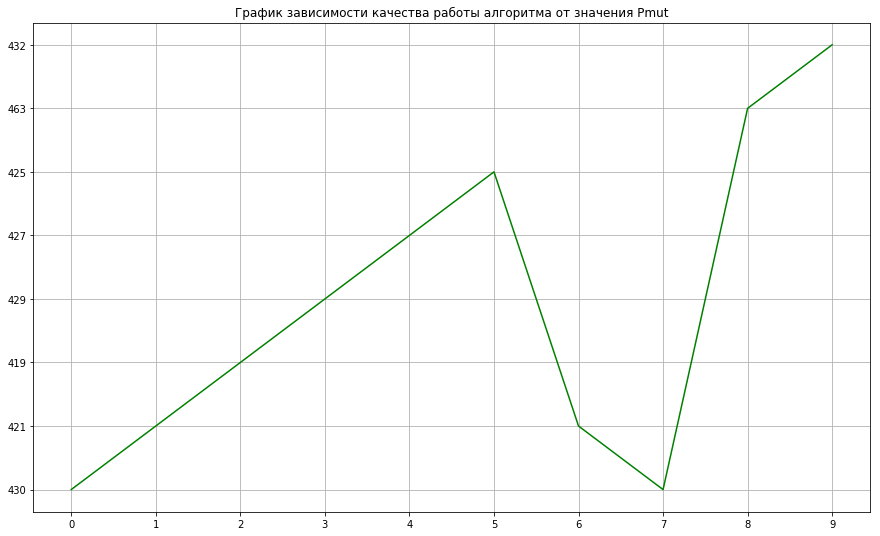

In [10]:
plt.figure(figsize=(15, 9))
plt.title("График зависимости качества работы алгоритма от значения Pmut")
plt.plot(list(res.index), list(res.value_max), 'g')
plt.xticks(list(res.index))
plt.grid()
plt.show()

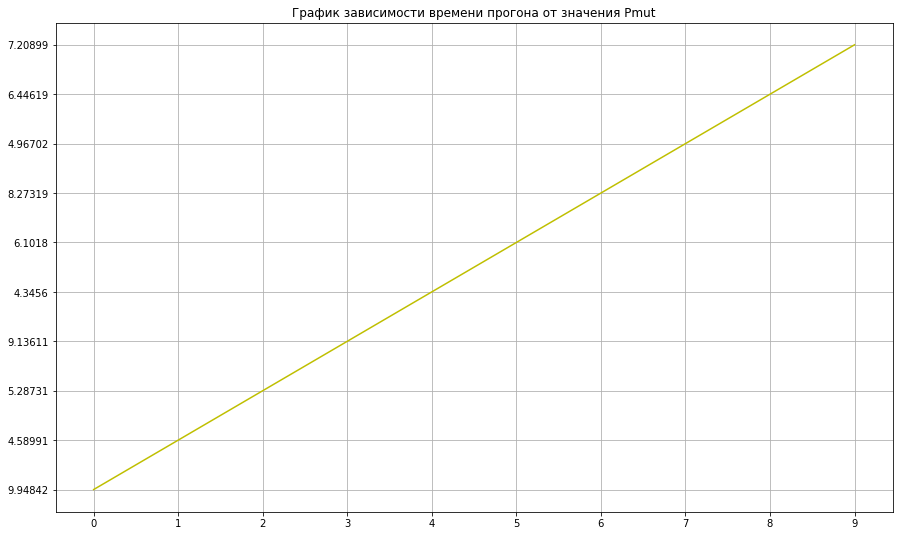

In [12]:
plt.figure(figsize=(15, 9))
plt.title("График зависимости времени прогона от значения Pmut")
plt.plot(list(res.index), list(res.max_time), 'y')
plt.xticks(list(res.index))
plt.grid()
plt.show()